# Assignment 6

*Dency Claris Thomas*

*Dataset 6*

(a) Please randomly choose two sets of nodes in Facebook-Ego dataset (each consists of 50 nodes without repetition), and calculate the cut size and conductance between the two sets of nodes. Please also plot the partitioning.


In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
# Load Facebook-Ego dataset
facebook_edges_file = 'datasets/1684.edges'
facebook_ego_graph = nx.read_edgelist(facebook_edges_file)

In [41]:
# Choose two sets of 50 random nodes without repetition
nodes = list(facebook_ego_graph.nodes())
set1 = set(random.sample(nodes, 50))
set2 = set(random.sample(list(node for node in nodes if node not in set1), 50))

Cut Size: 90
Conductance: 0.2839


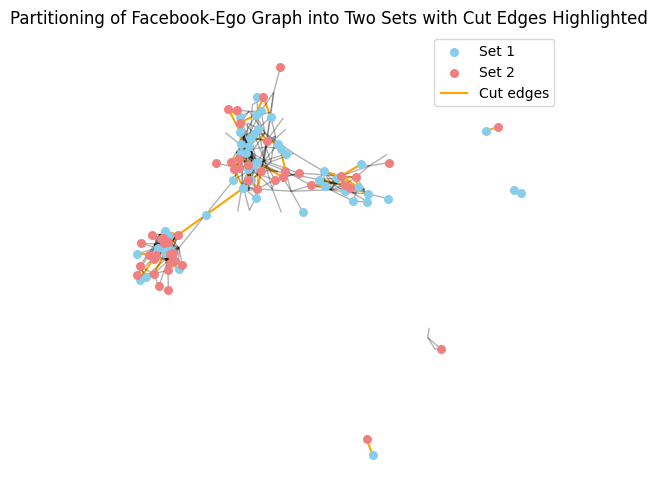

In [42]:
# Calculate the cut size
cut_edges = nx.cut_size(facebook_ego_graph, set1, set2)
print(f"Cut Size: {cut_edges}")

# Calculate conductance
def calculate_conductance(graph, set1, set2):
    cut_edges = nx.cut_size(graph, set1, set2)
    vol_set1 = nx.volume(graph, set1)
    vol_set2 = nx.volume(graph, set2)
    conductance = cut_edges / min(vol_set1, vol_set2)
    return conductance

conductance = calculate_conductance(facebook_ego_graph, set1, set2)
print(f"Conductance: {conductance:.4f}")

# Plot the partitioned graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(facebook_ego_graph, seed=42)

# Draw nodes for each partition with different colors
nx.draw_networkx_nodes(facebook_ego_graph, pos, nodelist=set1, node_color='skyblue', label='Set 1', node_size = 30)
nx.draw_networkx_nodes(facebook_ego_graph, pos, nodelist=set2, node_color='lightcoral', label='Set 2', node_size = 30)

# Draw edges, emphasizing cut edges in a different color
cut_edges_list = [(u, v) for u, v in facebook_ego_graph.edges() if (u in set1 and v in set2) or (u in set2 and v in set1)]
nx.draw_networkx_edges(facebook_ego_graph, pos, edgelist=cut_edges_list, edge_color='orange', width=1.5, label='Cut edges')
nx.draw_networkx_edges(facebook_ego_graph, pos, edgelist=[edge for edge in facebook_ego_graph.edges() if edge not in cut_edges_list], alpha=0.3)

# Adding labels and legend
plt.title("Partitioning of Facebook-Ego Graph into Two Sets with Cut Edges Highlighted")
plt.legend()
plt.axis('off')
plt.show()


(b) Please repeat the process mentioned in (a) again but with different sets of nodes. What differences have you observed? What cause the differences?

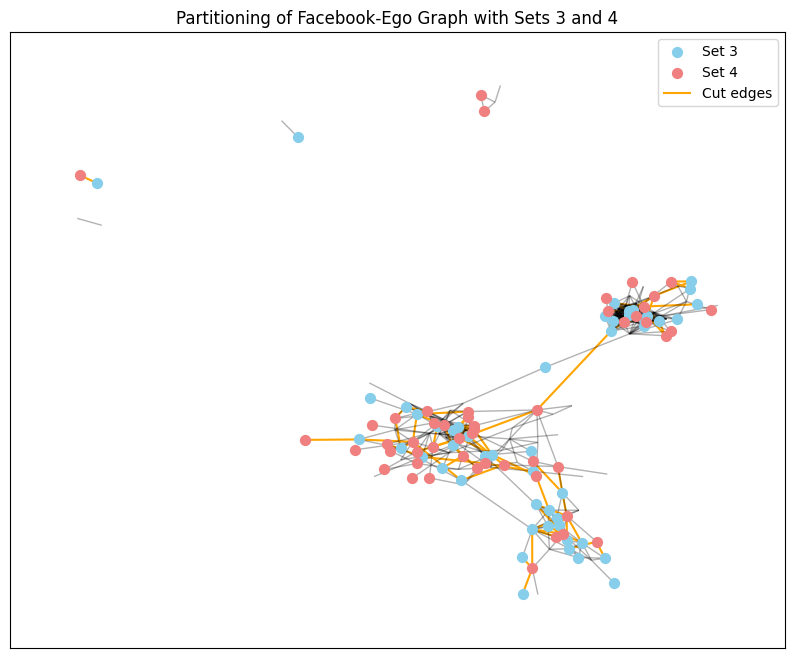

New cut size: 106
New conductance: 0.3271604938271605


In [46]:
# Generate a new sample of two sets of 50 nodes
set3 = set(random.sample(list(facebook_ego_graph.nodes), 50))
set4 = set(random.sample([node for node in facebook_ego_graph.nodes if node not in set3], 50))

# Define function for cut size and conductance calculation
def calculate_cut_conductance(graph, set_a, set_b):
    cut_size = len([(u, v) for u, v in graph.edges if (u in set_a and v in set_b) or (v in set_a and u in set_b)])
    volume_set_a = sum(1 for u, v in graph.edges if u in set_a or v in set_a)
    conductance = cut_size / min(volume_set_a, volume_set_a)
    return cut_size, conductance

# Calculate cut size and conductance for the new sets
cut_size2, conductance2 = calculate_cut_conductance(facebook_ego_graph, set3, set4)

# Plot the new partition
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(facebook_ego_graph, seed = 10)

# Plot nodes
nx.draw_networkx_nodes(facebook_ego_graph, pos, nodelist=set3, node_color="skyblue", label="Set 3", node_size=50)
nx.draw_networkx_nodes(facebook_ego_graph, pos, nodelist=set4, node_color="lightcoral", label="Set 4", node_size=50)

# Draw edges, emphasizing cut edges in a different color
cut_edges_list = [(u, v) for u, v in facebook_ego_graph.edges() if (u in set3 and v in set4) or (u in set4 and v in set3)]
nx.draw_networkx_edges(facebook_ego_graph, pos, edgelist=cut_edges_list, edge_color='orange', width=1.5, label='Cut edges')
nx.draw_networkx_edges(facebook_ego_graph, pos, edgelist=[edge for edge in facebook_ego_graph.edges() if edge not in cut_edges_list], alpha=0.3)

# Display plot with legend
plt.title("Partitioning of Facebook-Ego Graph with Sets 3 and 4")
plt.legend(loc="upper right")
plt.show()

print(f"New cut size: {cut_size2}")
print(f"New conductance: {conductance2}")


**Differences in Cut Size and Conductance Values:**

* The cut size values between the two partitions differ due to variations in the number of connections (edges) between the selected nodes in each set. For instance, if one partition has more cross-set edges (connections between nodes in different sets), it will result in a higher cut size than a partition with fewer cross-set edges.
* Conductance values will also vary as they depend on the ratio of the cut size to the smaller set’s volume (i.e., the number of edges associated with nodes within the set). A higher conductance indicates that a larger portion of the set’s edges connect to nodes outside the set, while a lower conductance suggests more intra-set connectivity.

**Possible Causes for Differences:**

* Network Structure: Facebook-Ego dataset have clusters of nodes that are densely connected internally. The specific choice of nodes for each set will affect how many edges lie between them versus within them, influencing both cut size and conductance.
* Node Density and Local Connections: If one partition samples nodes from a densely connected cluster, there may be fewer cross-set connections, resulting in a lower cut size and conductance. In contrast, if the nodes are scattered across different clusters, cross-set connections increase, leading to a higher cut size and conductance.
* Random Selection: Since node selection is random, the specific structure and density around the nodes in each sample will vary. This randomness naturally introduces differences in cut size and conductance across trials.

(c) Please output the Laplacian matrix of Facebook-Ego dataset.

In [49]:
import numpy as np

# Calculate the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(facebook_ego_graph).todense()

print("Laplacian Matrix of Facebook-Ego Dataset:")
print(laplacian_matrix)

Laplacian Matrix of Facebook-Ego Dataset:
[[12 -1  0 ...  0  0  0]
 [-1 10  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


(d) Please return the list of cliques over the entire Facebook-Ego dataset.

In [53]:
# Find all cliques
cliques = list(nx.find_cliques(facebook_ego_graph))

# Output the list of cliques
print("List of cliques in the Facebook-Ego dataset:")
for i, clique in enumerate(cliques, 1):
    print(f"Clique {i}: {clique}")

List of cliques in the Facebook-Ego dataset:
Clique 1: ['2723', '2711']
Clique 2: ['2723', '2787', '2715']
Clique 3: ['2723', '2787', '2690']
Clique 4: ['2772', '2674']
Clique 5: ['2772', '2803']
Clique 6: ['2772', '2748', '2751']
Clique 7: ['2772', '2748', '2785']
Clique 8: ['2772', '2709']
Clique 9: ['2772', '2744']
Clique 10: ['2772', '2668', '2751']
Clique 11: ['2752', '1405']
Clique 12: ['2752', '2734']
Clique 13: ['2752', '2781']
Clique 14: ['2700', '2791']
Clique 15: ['2700', '2784']
Clique 16: ['2700', '2709']
Clique 17: ['2687', '2742', '2716', '2780', '2785', '2661']
Clique 18: ['2687', '2742', '2716', '2780', '2785', '2748']
Clique 19: ['2709', '2780', '2795']
Clique 20: ['2709', '2735']
Clique 21: ['1171', '107', '171']
Clique 22: ['1171', '107', '1534', '1642']
Clique 23: ['1171', '107', '1534', '1450']
Clique 24: ['1171', '2677', '1642']
Clique 25: ['2737', '2724', '2682', '2775']
Clique 26: ['2737', '2724', '2662']
Clique 27: ['2737', '2724', '2730']
Clique 28: ['2737', 